# Genre classification using audio features

### Guillermo Aramburo Rodriguez

In [1]:
import glob # To import data
import librosa # For DSP
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_predict
import random
import IPython.display as ipd
import os
from pathlib import Path
from sklearn import naive_bayes as nb

path = Path(os.getcwd()) # Get current directory
fnames = glob.glob(str(path.parent) + "\\data\\genres_original\\*\\*.wav") # Go to parent folder to find data

genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']

# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 40))
target = np.zeros(len(fnames))

# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            mfcc_matrix = librosa.feature.mfcc(y=audio, sr=srate)
            mean_mfcc = np.mean(mfcc_matrix,axis=1)
            std_mfcc = np.std(mfcc_matrix, axis=1)
            audio_fvec = np.hstack([mean_mfcc, std_mfcc])
            audio_features[i] = audio_fvec
            target[i] = label

print(audio_features.shape)

Processing 0 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00000.wav
Processing 1 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00001.wav
Processing 2 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00002.wav
Processing 3 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00003.wav
Processing 4 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00004.wav
Processing 5 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00005.wav
Processing 6 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00006.wav
Processing 7 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\cou

In [2]:
clf = svm.SVC(gamma='scale', kernel='linear')
clf.fit(audio_features, target)
predicted = cross_val_predict(clf, audio_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[85  2  0  0 11  2  0  0  0  0]
 [ 0 49  9  0  7 13 11  5  5  1]
 [ 1  8 60 11  0  8  4  2  5  1]
 [ 0  2 10 61  0  1  5 17  1  3]
 [ 7  7  2  0 70  8  6  0  0  0]
 [ 0  7 19  5  3 36 18  3  3  6]
 [ 1 16  9  3 15  7 34  7  0  8]
 [ 2  7  9 23  1  3  4 45  5  1]
 [ 1  5 10  7  1  2  0  4 70  0]
 [ 0  3  4  9  0  9  3  1  0 71]]
Classification report for classifier SVC(kernel='linear'):
0.581



- Adapt the code to process the audio files you have downloaded on your own computer. Calculate using 10-fold cross-validation the classification accuracy and confusion matrix for this dataset using a linear SVM classifier and the sklearn Python framework for machine learning. Process the confusion matrix to display the musical genres sorted by classification accuracy from highest to lowest.

Classification report for classifier SVC(kernel='linear'):
0.581



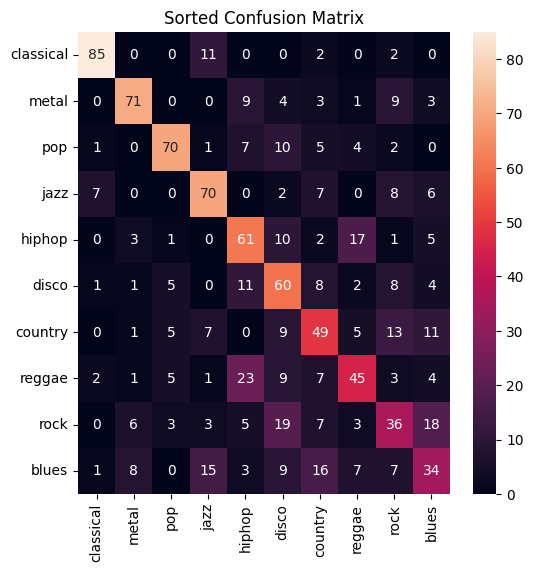

In [3]:
# perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
# Sort by diagonal values
idx = np.argsort(np.diag(cm))[::-1]
sortCm = cm[idx,:][:,idx]

# Unsorted confusion matrix
df_cmSVM = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

# Sorted confusion matrix
df_Scm = pd.DataFrame(sortCm, index = [genres[i] for i in idx],
                  columns = [genres[i] for i in idx])

# Plot
plt.figure(figsize = (6,6))
plt.title("Sorted Confusion Matrix")
sn.heatmap(df_Scm, annot=True)

# SVM Info
accSVMMFCC = metrics.accuracy_score(target, predicted)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

- Compute the confusion matrix and and classification accuracy using the sklearn Naive Bayes classifier. Briefly comment on the similarities and differences between these results and the ones from the linear SVM.

SVM performs 12% better than the Naives-Bayes classifier. The confusion matrix shows that the uncertainties for the classifiers are different. For example, the SVM classifier tends to confuses jazz with blues most of the times while the Naives-Bayes classifier tends to confuse jazz with classical most of the times.

Classification report for classifier GaussianNB():
0.463



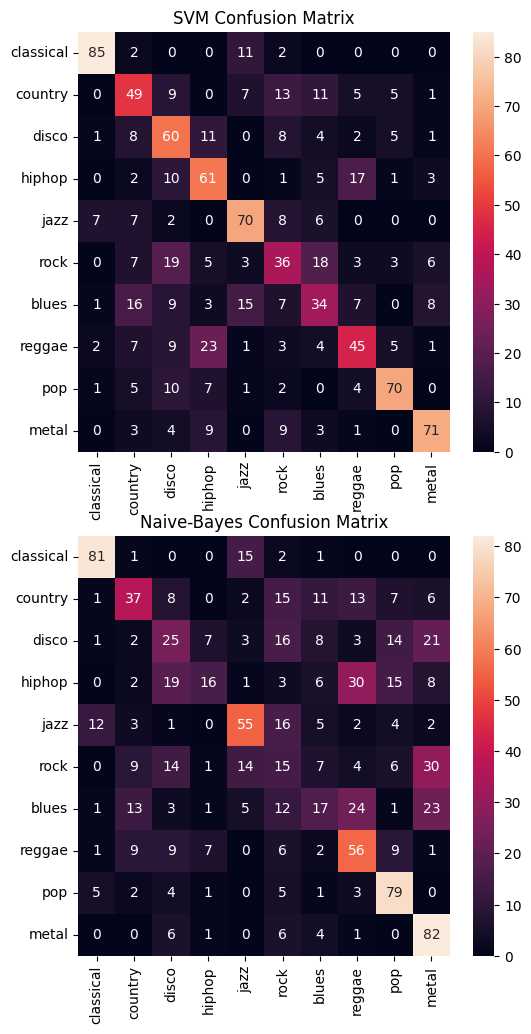

In [4]:
# Create classifier
clf2 = nb.GaussianNB()
# Fit with data
clf2.fit(audio_features, target)
# Perfrom 10 fold cross-validation
predNB = cross_val_predict(clf2, audio_features, target, cv=10)

# Get confusion matrix
cm = metrics.confusion_matrix(target, predNB) 

# Confusion matrix
df_cmNB = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

# Compare!
plt.figure(figsize = (6,12))
plt.subplot(2,1,1)
plt.title("SVM Confusion Matrix")
sn.heatmap(df_cmSVM, annot=True)
plt.subplot(2,1,2)
plt.title("Naive-Bayes Confusion Matrix")
sn.heatmap(df_cmNB, annot=True)

accNBMFCC = metrics.accuracy_score(target, predicted)
print("Classification report for classifier %s:\n%s\n"
      % (clf2, metrics.accuracy_score(target, predNB)))

- Use logistic regression classification for bar plot at end

In [5]:
# Create classifier
from sklearn import linear_model as lm
clf3 = lm.LogisticRegression()
# Fit with data
clf3.fit(audio_features, target)
# Perfrom 10 fold cross-validation
predLR = cross_val_predict(clf3, audio_features, target, cv=10)
# Get accuracy
accLRMFCC = metrics.accuracy_score(target, predLR)

c:\Users\garam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\garam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

- Replace the computation of the MFCCs from librosa with computing the CQT transform. Contrast the confusion matrix and classification accuracy comparing these two feature extraction strategies.

In [6]:
# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 24))
target = np.zeros(len(fnames))

# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            cqt_matrix = librosa.feature.chroma_cqt(y=audio, sr=srate)
            mean_cqt = np.mean(cqt_matrix,axis=1)
            std_cqt = np.std(cqt_matrix, axis=1)
            audio_fvec = np.hstack([mean_cqt, std_cqt])
            audio_features[i] = audio_fvec
            target[i] = label

print(audio_features.shape)

Processing 0 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00000.wav
Processing 1 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00001.wav
Processing 2 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00002.wav
Processing 3 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00003.wav
Processing 4 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00004.wav
Processing 5 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00005.wav
Processing 6 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00006.wav
Processing 7 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\cou

In [7]:
# For CQT using SVM, perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
accSVMCQT = metrics.accuracy_score(target, predicted)
# Unsorted confusion matrix
df_cmCQTSVM = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

In [8]:
# For CQT using NB, perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf2, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
accNBCQT = metrics.accuracy_score(target, predicted)
# Unsorted confusion matrix
df_cmCQTNB = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

Text(0.5, 0.98, 'Confusion Matrix Comparison')

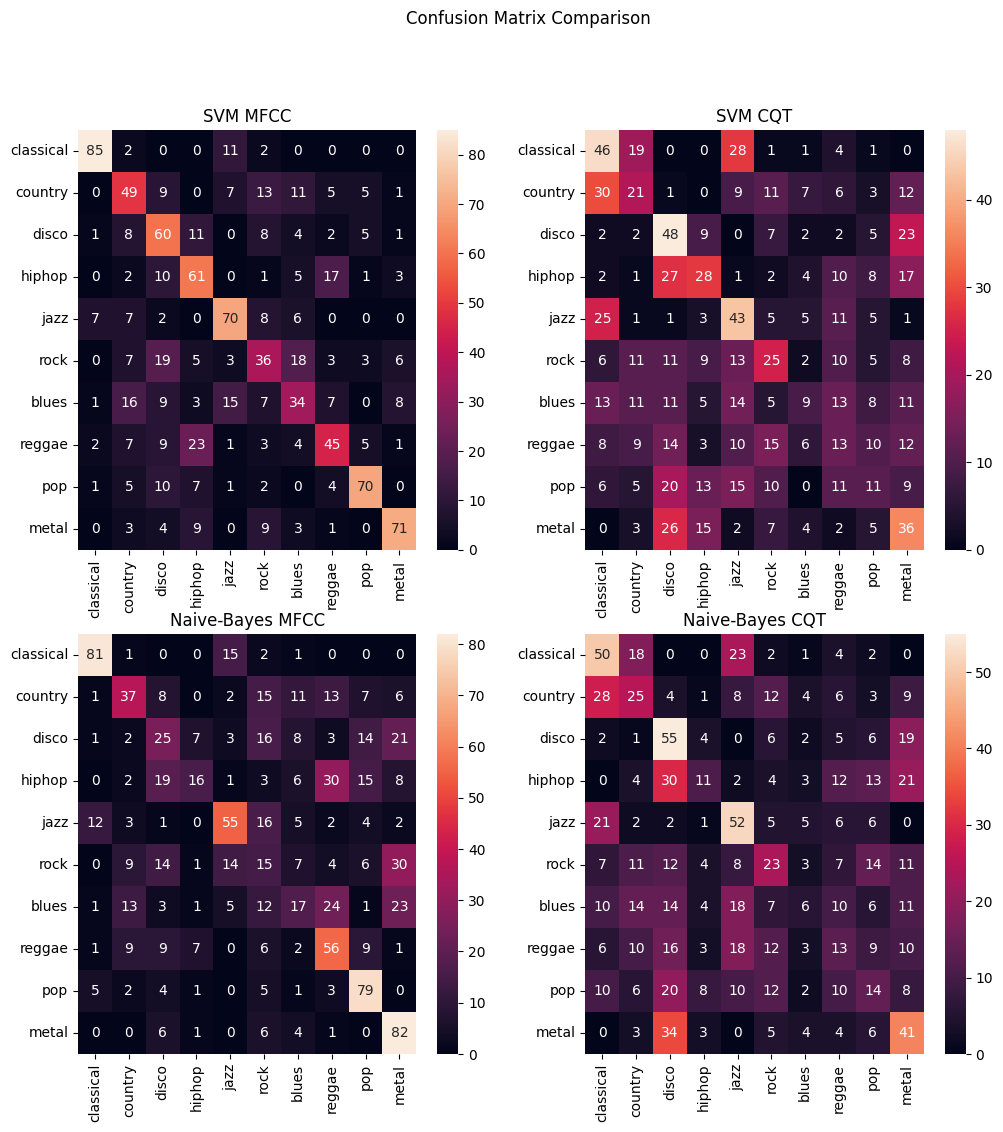

In [9]:
# Compare!
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
plt.title("SVM MFCC")
sn.heatmap(df_cmSVM, annot=True)
plt.subplot(2,2,2)
plt.title("SVM CQT")
sn.heatmap(df_cmCQTSVM, annot=True)
plt.subplot(2,2,3)
plt.title("Naive-Bayes MFCC")
sn.heatmap(df_cmNB, annot=True)
plt.subplot(2,2,4)
plt.title("Naive-Bayes CQT")
sn.heatmap(df_cmCQTNB, annot=True)
plt.suptitle("Confusion Matrix Comparison")

By looking at the color shade of the diagonal it is very clear that MFCC performs much better than the CQT transform as an audio feature for genre classification with the given dataset.

- Write your own feature extractor we will call half-octave energies. You will need to perform block processing and for every block calculate the magnitude spectrum using the Discrete Fourier Transform. Use a window size and hop size of 512 samples. Your feature will consists of energy ratios of half-octaves. Each magnitude bin will be mapped to a corresponding MIDI note number using the equation:
$$ \text{midi} = \text{int}(12 * (log_2(freq) - log_2(440.0)) + 69.0) $$

- Each MIDI note number can then be mapped to a corresponding half-octave. Use C1 ~= 32.70 Hz as the starting note and compute this way for 5 octaves. The resulting vector will have 10 values one for each half octave in this range. Sum the magnitudes of all DFT bins that map to a particular half-octave. The resulting vector will have 10 values corresponding to the magnitude sums for each half-octave. Finally normalize the vector by dividing by the sum of all elements. Calculate these new audio features for the GTZAN dataset and compute the 10-fold cross-validation accuracy and confusion matrix using a linear SVM classifier similarly to the previous examples.

In [10]:
# Half-Octave Energies feature
blockSize = 512
startNote = 24 # Midi note for C1
rng = 6 # Range to sum midi notes
span = 10 # Times to repeat range summation
def HOE(track):
    features = np.zeros(span)
    audio, srate = librosa.load(track)
    STFT = librosa.stft(audio, hop_length=blockSize, win_length=blockSize)
    Nfft = len(STFT[0,:]) # Number of FFT bins
    f = np.arange(0, 1 + Nfft / 2) * srate / Nfft # Freq axis
    f[0] = 1e-6 # To avoid numerical error
    # Map bins to midi
    midi = np.round(12 * (np.log2(f) - np.log2(440)) + 69).astype(int)
    for n in range(span):
        start = np.argwhere(midi >= (startNote + rng*n) )[0].astype(int)
        end = np.argwhere(midi > (startNote + rng*(n + 1)) )[0].astype(int)
        features[n] = np.sum( np.abs(STFT[:,start[0]:end[0]]), axis=0)[0]
    # Normalize
    features = features / np.max(features)
    return features

In [11]:
# Extract HOE audio feature from dataset
audio_features = np.zeros((len(fnames), span))
target = np.zeros(len(fnames))

for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres):
        if genre in fname:     
            audio_features[i,:] = HOE(fname)
            target[i] = label

print(audio_features.shape)

Processing 0 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00000.wav
Processing 1 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00001.wav
Processing 2 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00002.wav
Processing 3 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00003.wav
Processing 4 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00004.wav
Processing 5 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00005.wav
Processing 6 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\blues\blues.00006.wav
Processing 7 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\cou

C:\Users\garam\AppData\Local\Temp\ipykernel_16924\2297023044.py:20: RuntimeWarning: invalid value encountered in divide
  features = features / np.max(features)


Processing 440 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00040.wav
Processing 441 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00041.wav
Processing 442 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00042.wav
Processing 443 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00043.wav
Processing 444 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00044.wav
Processing 445 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00045.wav
Processing 446 c:\Users\garam\OneDrive\Documentos\Github Repo\mir_program_kadenze\course2\data\genres_original\hiphop\hiphop.00046.wav
Processing 447 c:\Users\garam\OneDrive\Documentos\Githu

In [12]:
# Clear nan values
audio_features[np.isnan(audio_features)] = 0

# For HOE using SVM, perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
accSVMHOE = metrics.accuracy_score(target, predicted)
# Unsorted confusion matrix
df_cmHOESVM = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

In [13]:
# For HOE using NB, perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf2, audio_features, target, cv=10)
# Get confusion matrix
cm = metrics.confusion_matrix(target, predicted) 
accNBHOE = metrics.accuracy_score(target, predicted)
# Unsorted confusion matrix
df_cmHOENB = pd.DataFrame(cm, index = [i for i in genres],
                  columns = [i for i in genres])

Text(0.5, 0.98, 'Confusion Matrix Comparison')

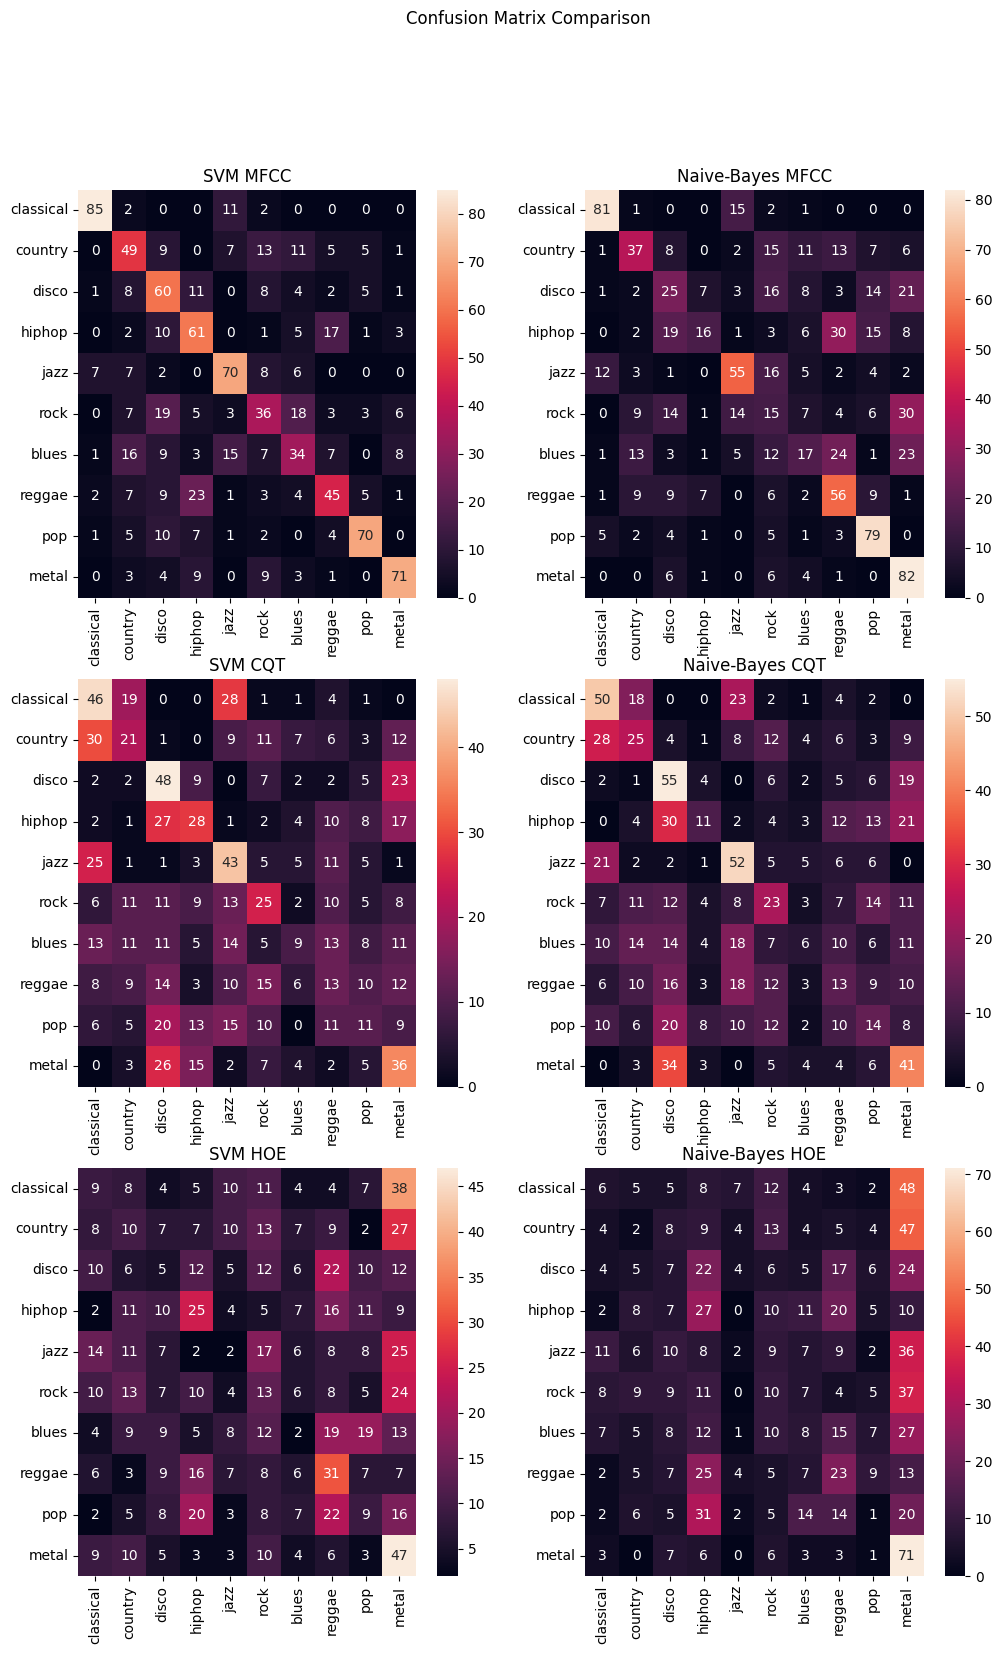

In [14]:
# Compare!
plt.figure(figsize = (12,18))
plt.subplot(3,2,1)
plt.title("SVM MFCC")
sn.heatmap(df_cmSVM, annot=True)
plt.subplot(3,2,3)
plt.title("SVM CQT")
sn.heatmap(df_cmCQTSVM, annot=True)
plt.subplot(3,2,2)
plt.title("Naive-Bayes MFCC")
sn.heatmap(df_cmNB, annot=True)
plt.subplot(3,2,4)
plt.title("Naive-Bayes CQT")
sn.heatmap(df_cmCQTNB, annot=True)
plt.subplot(3,2,5)
plt.title("SVM HOE")
sn.heatmap(df_cmHOESVM, annot=True)
plt.subplot(3,2,6)
plt.title("Naive-Bayes HOE")
sn.heatmap(df_cmHOENB, annot=True)
plt.suptitle("Confusion Matrix Comparison")

HOE gave the worst results as it's clear by looking at the diagonal of the confusion matrix.

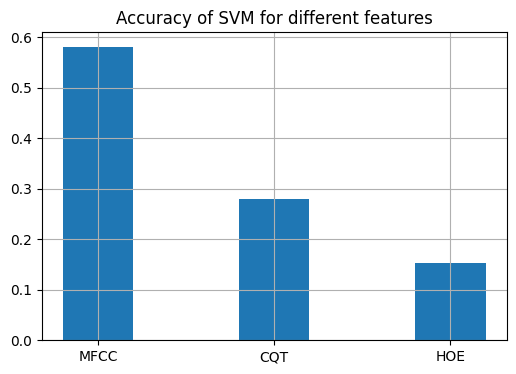

In [15]:
featNames = ['MFCC', 'CQT', 'HOE']
featValues = [accSVMMFCC, accSVMCQT, accSVMHOE]
plt.figure(figsize=(6,4))
plt.title('Accuracy of SVM for different features')
plt.bar(featNames, featValues, width = 0.4)
plt.grid()
plt.show()

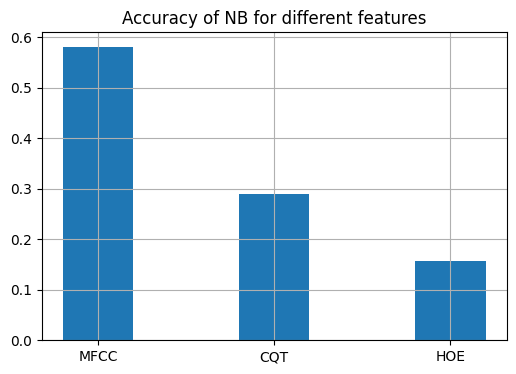

In [16]:
featValues = [accNBMFCC, accNBCQT, accNBHOE]
plt.figure(figsize=(6,4))
plt.title('Accuracy of NB for different features')
plt.bar(featNames, featValues, width = 0.4)
plt.grid()
plt.show()

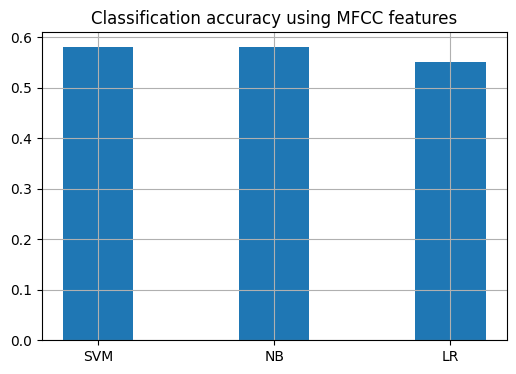

In [17]:
featValues = [accSVMMFCC, accNBMFCC, accLRMFCC]
clfNames = ['SVM', 'NB', 'LR']
plt.figure(figsize=(6,4))
plt.title('Classification accuracy using MFCC features')
plt.bar(clfNames, featValues, width = 0.4)
plt.grid()
plt.show()